# PhI Main PPI network analysis

In [1]:
%matplotlib inline

import sys; sys.path.insert(0, "..")

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import collections
from math import log

# import time
import pickle

# from random import sample
from communityDetection.orcci import *
# from genex.pobsnet_sinfo import *

In [2]:
verbose = "TRACE"

filename = "../data/PhIMain/PhIMain.xlsx"

df = pd.read_excel(filename)
df.head()

,IntA,IntB,PhIMAIN
0,AT1G01030,AT3G17600,1
1,AT1G01140,AT2G23290,1
2,AT1G01360,AT4G26080,1
3,AT1G04100,AT1G15050,1
4,AT1G04100,AT2G33310,1


In [3]:
gene1_label = "IntA"
gene2_label = "IntB"
g = nx.from_pandas_edgelist(df,source=gene1_label,target=gene2_label)
g.name = 'PhIMain'

In [4]:
print(nx.info(g))
print("Number of connected components:", nx.number_connected_components(g), "\n")

edge_selfloops = [e1 for e1, e2 in nx.selfloop_edges(g)]
g.remove_edges_from(nx.selfloop_edges(g))

print("<<< Without self loops >>>")
print(nx.info(g))
print("Number of self loops:", len(edge_selfloops))

# degree list
degree_list = sorted(g.degree, key=lambda x: x[1], reverse=True)
print("Top 5 highest degree nodes:", degree_list[0:5])

Name: PhIMain
Type: Graph
Number of nodes: 273
Number of edges: 529
Average degree:   3.8755
Number of connected components: 17 

<<< Without self loops >>>
Name: PhIMain
Type: Graph
Number of nodes: 273
Number of edges: 495
Average degree:   3.6264
Number of self loops: 34
Top 5 highest degree nodes: [('AT1G35560', 43), ('AT1G31880', 26), ('AT2G01760', 22), ('AT4G37260', 19), ('AT4G32570', 17)]


Text(0.5, 0, 'Degree')

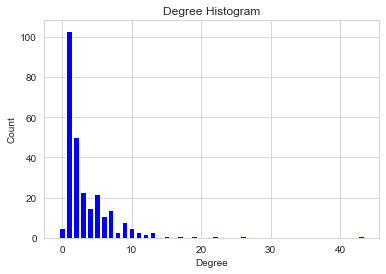

In [5]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

In [6]:
for idx, node in enumerate(g.nodes()):
    print(idx, node, g.nodes[node])
    if idx == 5:
        break
    
for idx, edge in enumerate(g.edges()):
    print(idx, edge, g.edges[edge])
    if idx == 5:
        break

0 AT1G01030 {}
1 AT3G17600 {}
2 AT1G01140 {}
3 AT2G23290 {}
4 AT1G01360 {}
5 AT4G26080 {}
0 ('AT1G01030', 'AT3G17600') {}
1 ('AT3G17600', 'AT2G01760') {}
2 ('AT3G17600', 'AT2G28350') {}
3 ('AT3G17600', 'AT2G38490') {}
4 ('AT3G17600', 'AT3G15540') {}
5 ('AT3G17600', 'AT4G30080') {}


### ORCCI

In [7]:
orc_main_noinfo, partitions_list = orcci(g,verbose="INFO")

Using number of cpu threads: = 16

Partition splits
iteration: 26,	 #components: 18,	 max_component_size: 241,	 modularity: 0.0594
iteration: 59,	 #components: 19,	 max_component_size: 238,	 modularity: 0.0670
iteration: 69,	 #components: 20,	 max_component_size: 219,	 modularity: 0.1984
iteration: 121,	 #components: 21,	 max_component_size: 207,	 modularity: 0.2378
iteration: 132,	 #components: 22,	 max_component_size: 190,	 modularity: 0.2875
iteration: 134,	 #components: 23,	 max_component_size: 190,	 modularity: 0.2849
iteration: 139,	 #components: 24,	 max_component_size: 190,	 modularity: 0.2831
iteration: 141,	 #components: 25,	 max_component_size: 182,	 modularity: 0.3017
iteration: 143,	 #components: 26,	 max_component_size: 166,	 modularity: 0.4055
iteration: 147,	 #components: 27,	 max_component_size: 122,	 modularity: 0.5219
iteration: 148,	 #components: 28,	 max_component_size: 96,	 modularity: 0.5580
iteration: 149,	 #components: 29,	 max_component_size: 51,	 modularity: 

In [8]:
g_orc = orc_main_noinfo.G
for idx, node in enumerate(g_orc.nodes()):
    print(idx, node, g_orc.nodes[node])
    if idx == 5:
        break
    
for idx, edge in enumerate(g_orc.edges()):
    print(idx, edge, g_orc.edges[edge])
    if idx == 5:
        break

0 AT1G01030 {'blockRicciMaxMod': 0, 'blockRicciFinal': 0}
1 AT3G17600 {'blockRicciMaxMod': 0, 'blockRicciFinal': 0}
2 AT1G01140 {'blockRicciMaxMod': 1, 'blockRicciFinal': 1}
3 AT2G23290 {'blockRicciMaxMod': 1, 'blockRicciFinal': 1}
4 AT1G01360 {'blockRicciMaxMod': 2, 'blockRicciFinal': 2}
5 AT4G26080 {'blockRicciMaxMod': 2, 'blockRicciFinal': 2}
0 ('AT1G01030', 'AT3G17600') {'weight': 1.0, 'ricciCurvature': 1.999999979396261e-05}
1 ('AT3G17600', 'AT2G01760') {'weight': 1.0, 'ricciCurvature': -1.1364272081853386}
2 ('AT3G17600', 'AT2G28350') {'weight': 1.0, 'ricciCurvature': 1.9999999793851586e-05}
3 ('AT3G17600', 'AT2G38490') {'weight': 1.0, 'ricciCurvature': -1.0000414492231098}
4 ('AT3G17600', 'AT3G15540') {'weight': 1.0, 'ricciCurvature': -1.1334575106713105}
5 ('AT3G17600', 'AT4G30080') {'weight': 1.0, 'ricciCurvature': -0.500017693377572}


### Write to file

In [9]:
# Saving the objects:
pickle_file = "../results/ppi/ppi_main.pickle"
with open(pickle_file, 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([orc_main_noinfo, partitions_list], f)
f.close()

file = "../results/ppi/ppi_main.gml"
nx.write_gml(g_orc,file)

In [10]:
# Getting back the objects:
pickle_file = "../results/ppi/ppi_main.pickle"
with open(pickle_file,'rb') as f:  # Python 3: open(..., 'rb')
    orc_noinfo, partitions_list = pickle.load(f)
f.close()

print(nx.info(orc_noinfo.G))
# for node in orc_noinfo.G.nodes():
#     print(orc_noinfo.G.nodes[node])

Name: PhIMain
Type: Graph
Number of nodes: 273
Number of edges: 495
Average degree:   3.6264


#### Community detection on the largest component

In [11]:
# only get the largest component
largest_cc = max(nx.connected_components(g), key=len)
G = g.subgraph(largest_cc)
G = nx.Graph(G) # unfreeze graph
print(nx.info(G))

degree_list = sorted(G.degree, key=lambda x: x[1], reverse=True)
print("Top 5 highest degree nodes:", degree_list[0:5])

# draw the network
# nx.draw_kamada_kawai(G)

Name: PhIMain
Type: Graph
Number of nodes: 246
Number of edges: 484
Average degree:   3.9350
Top 5 highest degree nodes: [('AT1G35560', 43), ('AT1G31880', 26), ('AT2G01760', 22), ('AT4G37260', 19), ('AT4G32570', 17)]


Text(0.5, 0, 'Degree')

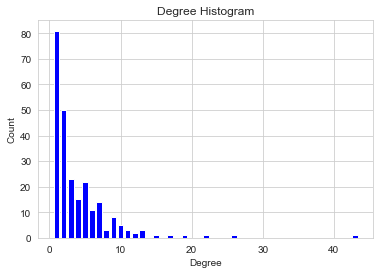

In [12]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

In [13]:
g_lc_orc, partitions_list = orcci(G,verbose="INFO")

Using number of cpu threads: = 16

Partition splits
iteration: 26,	 #components: 2,	 max_component_size: 241,	 modularity: 0.0163
iteration: 59,	 #components: 3,	 max_component_size: 238,	 modularity: 0.0244
iteration: 69,	 #components: 4,	 max_component_size: 219,	 modularity: 0.1623
iteration: 121,	 #components: 5,	 max_component_size: 207,	 modularity: 0.2040
iteration: 132,	 #components: 6,	 max_component_size: 190,	 modularity: 0.2568
iteration: 134,	 #components: 7,	 max_component_size: 190,	 modularity: 0.2542
iteration: 139,	 #components: 8,	 max_component_size: 190,	 modularity: 0.2524
iteration: 141,	 #components: 9,	 max_component_size: 182,	 modularity: 0.2722
iteration: 143,	 #components: 10,	 max_component_size: 166,	 modularity: 0.3813
iteration: 147,	 #components: 11,	 max_component_size: 122,	 modularity: 0.5043
iteration: 148,	 #components: 12,	 max_component_size: 96,	 modularity: 0.5428
iteration: 149,	 #components: 13,	 max_component_size: 51,	 modularity: 0.5746
i

In [14]:
print("number of communities: ", len(partitions_list))

number of communities:  59


44
[0] iteration: 1,	 #components: 1,	 max_component_size: 246,	 modularity: 0.0000
[1] iteration: 26,	 #components: 2,	 max_component_size: 241,	 modularity: 0.0163
[2] iteration: 59,	 #components: 3,	 max_component_size: 238,	 modularity: 0.0244
[3] iteration: 69,	 #components: 4,	 max_component_size: 219,	 modularity: 0.1623
[4] iteration: 121,	 #components: 5,	 max_component_size: 207,	 modularity: 0.2040
[5] iteration: 132,	 #components: 6,	 max_component_size: 190,	 modularity: 0.2568
[6] iteration: 134,	 #components: 7,	 max_component_size: 190,	 modularity: 0.2542
[7] iteration: 139,	 #components: 8,	 max_component_size: 190,	 modularity: 0.2524
[8] iteration: 141,	 #components: 9,	 max_component_size: 182,	 modularity: 0.2722
[9] iteration: 143,	 #components: 10,	 max_component_size: 166,	 modularity: 0.3813
[10] iteration: 147,	 #components: 11,	 max_component_size: 122,	 modularity: 0.5043
[11] iteration: 148,	 #components: 12,	 max_component_size: 96,	 modularity: 0.5428
[1

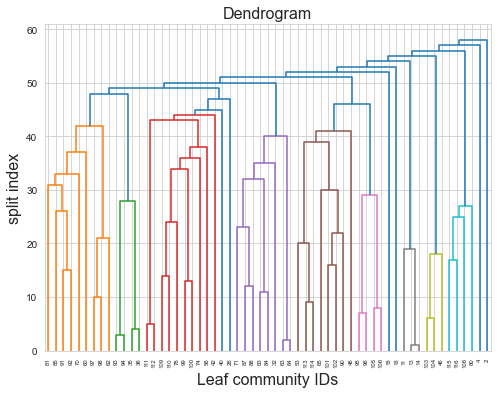

In [15]:
split_idx = 14

threshold = len(partitions_list) - (split_idx + 1)
print(threshold)

draw_dendrogram(partitions_list, threshold=threshold, figsize=(8,6),verbose=True)

In [16]:
file = "../results/ppi/Phi_Main_ppi_lc.gml"
nx.write_gml(g_lc_orc.G,file)

### Side Information 

In [17]:
filename = "../data/PhIMain/Phi_Main_ppi_all_sideinfo.xlsx"

df_sinfo = pd.read_excel(filename,header=0) # ,index_col=1
df_sinfo = df_sinfo[['Label','SideInfo']]
df_sinfo = df_sinfo[[isinstance(x,str) for x in df_sinfo['SideInfo']]]  # filter row with valid SideInfo
pathway_list = list(set(df_sinfo['SideInfo']))
pathway_list.sort()
pathway_list.insert(0,'unknown')
print("Amount of SideInfo: %d" % len(df_sinfo))
print("Number of known pathways: %d" % (len(pathway_list)-1))
print("Pathways:", pathway_list[1:])

Amount of SideInfo: 160
Number of known pathways: 8
Pathways: ['abscisic acid', 'auxin', 'brassinosteroid', 'cytokinin', 'ethylene', 'gibberellin', 'jasmonic acid', 'salicylic acid']


In [18]:
# label nodes with known pathways
nx.set_node_attributes(g, 'unknown', "pathway")
nx.set_node_attributes(g, 0, "pathwayID")

for idx, row  in df_sinfo.iterrows():
    gene = row['Label']
    sinfo_label = row['SideInfo']
    path_id = pathway_list.index(sinfo_label)
    g.nodes[gene]['pathway'] = sinfo_label
    g.nodes[gene]['pathwayID'] = path_id
    
for node in g.nodes():
    print(node, g.nodes[node])

AT1G01030 {'pathway': 'auxin', 'pathwayID': 2}
AT3G17600 {'pathway': 'auxin', 'pathwayID': 2}
AT1G01140 {'pathway': 'unknown', 'pathwayID': 0}
AT2G23290 {'pathway': 'unknown', 'pathwayID': 0}
AT1G01360 {'pathway': 'abscisic acid', 'pathwayID': 1}
AT4G26080 {'pathway': 'unknown', 'pathwayID': 0}
AT1G04100 {'pathway': 'auxin', 'pathwayID': 2}
AT1G15050 {'pathway': 'auxin', 'pathwayID': 2}
AT2G33310 {'pathway': 'auxin', 'pathwayID': 2}
AT3G04730 {'pathway': 'auxin', 'pathwayID': 2}
AT3G16500 {'pathway': 'auxin', 'pathwayID': 2}
AT3G23030 {'pathway': 'auxin', 'pathwayID': 2}
AT4G14560 {'pathway': 'auxin', 'pathwayID': 2}
AT1G04240 {'pathway': 'auxin', 'pathwayID': 2}
AT1G04250 {'pathway': 'auxin', 'pathwayID': 2}
AT3G15540 {'pathway': 'auxin', 'pathwayID': 2}
AT1G04550 {'pathway': 'auxin', 'pathwayID': 2}
AT1G07430 {'pathway': 'abscisic acid', 'pathwayID': 1}
AT4G01026 {'pathway': 'abscisic acid', 'pathwayID': 1}
AT4G18620 {'pathway': 'abscisic acid', 'pathwayID': 1}
AT1G10940 {'pathway': 

In [19]:
def insert_to_dict_list(dict_list, key, val):
    if key in dict_list:
        dict_list[key].append(val)
    else:
        dict_list[key] = [val]

In [20]:
# create side information list

# check if known nodes belonging to the same community have connection
known_partition = dict()  # {0: [], 1: [], 2: []}

edges_known = []  # list of all edges known (both existing and artificially created)
nodes_known = list(df_sinfo['Label'])
for i in nodes_known:
    block = g.nodes[i]['pathway']
    insert_to_dict_list(known_partition, block, i)
    # known_partition[block].append(i)
    # print(i, block)

print("Side Info Summary:")
for i in known_partition:
    print(i, len(known_partition[i]))
    
edges_known = []

Side Info Summary:
auxin 39
cytokinin 7
ethylene 24
abscisic acid 32
brassinosteroid 13
gibberellin 13
jasmonic acid 14
salicylic acid 18


In [21]:
for pathway_type in known_partition:
    pathway_gene_list = known_partition[pathway_type]
    for idx1, gene1 in enumerate(pathway_gene_list):
        for idx2, gene2 in enumerate(pathway_gene_list[idx1+1:]):
                
            # Trial # 2: Soft force of weight to maximum (and ORC)
            if g.has_edge(gene1,gene2):
                edges_known.append((gene1, gene2))
                # g.edges[(gene1, gene2)][''] = 1.0  # unweighted
        
# print("Known edges:")
# print(edges_known)
print("Number of known edges:", len(edges_known))

Number of known edges: 95


In [22]:
print(nx.info(g))

Name: PhIMain
Type: Graph
Number of nodes: 273
Number of edges: 495
Average degree:   3.6264


### ORCCI with side info

In [23]:
g_orc, partitions_list = orcci(g, edges_known=edges_known, block_label="blockRicciSinfo", verbose="INFO")

Using number of cpu threads: = 16

Partition splits
iteration: 22,	 #components: 18,	 max_component_size: 241,	 modularity: 0.0594
iteration: 51,	 #components: 19,	 max_component_size: 238,	 modularity: 0.0670
iteration: 121,	 #components: 20,	 max_component_size: 226,	 modularity: 0.1105
iteration: 132,	 #components: 21,	 max_component_size: 215,	 modularity: 0.1444
iteration: 134,	 #components: 22,	 max_component_size: 215,	 modularity: 0.1426
iteration: 138,	 #components: 23,	 max_component_size: 209,	 modularity: 0.1659
iteration: 143,	 #components: 24,	 max_component_size: 128,	 modularity: 0.4300
iteration: 153,	 #components: 25,	 max_component_size: 125,	 modularity: 0.4307
iteration: 154,	 #components: 26,	 max_component_size: 102,	 modularity: 0.4611
iteration: 156,	 #components: 27,	 max_component_size: 100,	 modularity: 0.4613
iteration: 158,	 #components: 28,	 max_component_size: 98,	 modularity: 0.4615
iteration: 159,	 #components: 29,	 max_component_size: 92,	 modularity:

In [24]:
# Saving the objects:
pickle_file = "../results/ppi/ppi_main_sinfo.pickle"
with open(pickle_file, 'wb') as f:
    pickle.dump([g_orc, partitions_list], f)
f.close()

file = "../results/ppi/ppi_main_sinfo.gml"
nx.write_gml(g_orc.G,file)

In [25]:
# Getting back the objects:
pickle_file = "../results/ppi/ppi_main_sinfo.pickle"
with open(pickle_file,'rb') as f:
    orc_noinfo, partitions_list = pickle.load(f)
f.close()

g_orc = orc_noinfo.G